# Exercise 4.1

Matrix A created with shape: (10, 6)
Matrix A:
[[ 0.5  -0.14  0.65  1.52 -0.23 -0.23]
 [ 1.58  0.77 -0.47  0.54 -0.46 -0.47]
 [ 0.24 -1.91 -1.72 -0.56 -1.01  0.31]
 [-0.91 -1.41  1.47 -0.23  0.07 -1.42]
 [-0.54  0.11 -1.15  0.38 -0.6  -0.29]
 [-0.6   1.85 -0.01 -1.06  0.82 -1.22]
 [ 0.21 -1.96 -1.33  0.2   0.74  0.17]
 [-0.12 -0.3  -1.48 -0.72 -0.46  1.06]
 [ 0.34 -1.76  0.32 -0.39 -0.68  0.61]
 [ 1.03  0.93 -0.84 -0.31  0.33  0.98]]
Shape of U: (10, 10)
Shape of singular values vector s: (6,)
Shape of Vt: (6, 6)

Constructed full Sigma matrix with shape: (10, 6)
Reconstruction Error (Frobenius Norm): 7.713268229125658e-15
Reconstructed and original are similar with sufficient approximation: True
Singular Values (sigma): [4.53270928 3.73907164 2.72173241 1.89806806 1.59069575 1.43784506]


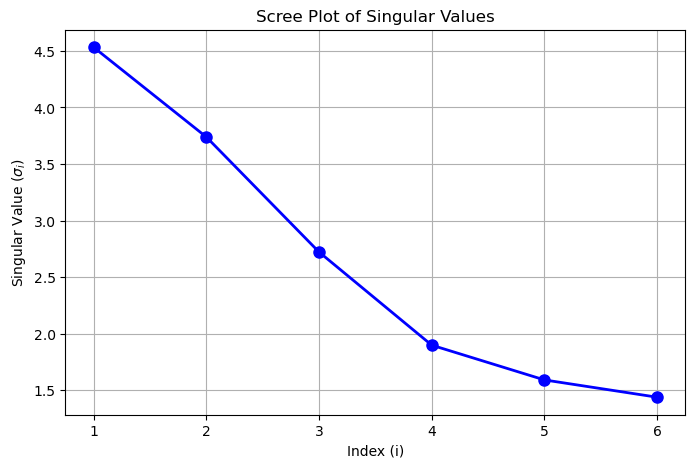

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

m = 10
n = 6
A = np.random.randn(m, n)

print(f"Matrix A created with shape: {A.shape}")
print("Matrix A:")
print(np.round(A, 2))

U, s, Vt = np.linalg.svd(A, full_matrices=True)

print(f"Shape of U: {U.shape}")
print(f"Shape of singular values vector s: {s.shape}")
print(f"Shape of Vt: {Vt.shape}")

Sigma = np.zeros((m, n))

k = min(m, n)
Sigma[:k, :k] = np.diag(s)

print(f"\nConstructed full Sigma matrix with shape: {Sigma.shape}")

A_reconstructed = U @ Sigma @ Vt

difference = A - A_reconstructed
frobenius_error = np.linalg.norm(difference, ord='fro')

is_close = np.allclose(A, A_reconstructed)

print(f"Reconstruction Error (Frobenius Norm): {frobenius_error}")
print(f"Reconstructed and original are similar with sufficient approximation: {is_close}")

print("Singular Values (sigma):", s)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(s) + 1), s, 'bo-', linewidth=2, markersize=8)
plt.title('Scree Plot of Singular Values')
plt.xlabel('Index (i)')
plt.ylabel('Singular Value ($\sigma_i$)')
plt.grid(True)
plt.xticks(range(1, len(s) + 1))
plt.show()

# Exercise 4.2

Rank k=1: Error = 5.4396
Rank k=2: Error = 3.9507
Rank k=3: Error = 2.8636
Rank k=4: Error = 2.1442
Rank k=5: Error = 1.4378
Rank k=6: Error = 0.0000


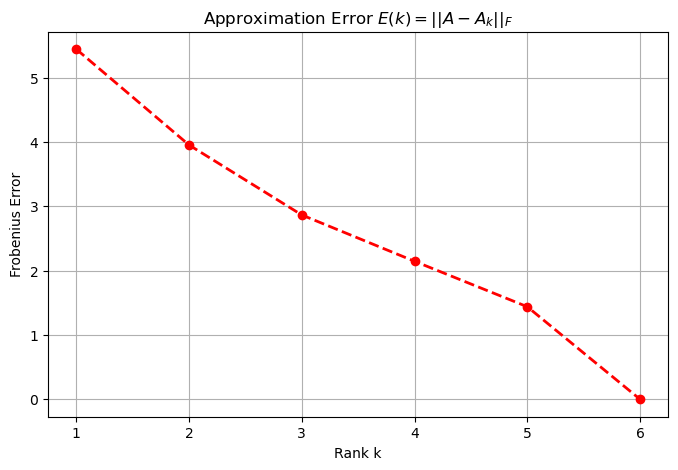

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
A = np.random.randn(10, 6)
U, s, VT = np.linalg.svd(A, full_matrices=True)

def get_rank_k_approximation(U, s, VT, k):

    U_k = U[:, :k]
    S_k = np.diag(s[:k])
    VT_k = VT[:k, :]
    
    return U_k @ S_k @ VT_k

frobenius_errors = []
rank_range = range(1, len(s) + 1) 

for k in rank_range:
    Ak = get_rank_k_approximation(U, s, VT, k)
    error = np.linalg.norm(A - Ak, ord='fro')
    frobenius_errors.append(error)
    print(f"Rank k={k}: Error = {error:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(rank_range, frobenius_errors, 'o--', color='red', linewidth=2)
plt.title(r'Approximation Error $E(k) = ||A - A_k||_F$')
plt.xlabel('Rank k')
plt.ylabel('Frobenius Error')
plt.grid(True)
plt.xticks(rank_range)
plt.show()


# Exercise 4.3

Image loaded. Shape: 512x512
SVD Computed. U: (512, 512), s: (512,), Vt: (512, 512)
--------------------------------------------------
k     | Compression  | Error (Frobenius)   
--------------------------------------------------
5     | 0.9804       | 13086.8683
20    | 0.9218       | 7699.9091
50    | 0.8045       | 4836.0689
100   | 0.6090       | 2992.1444
200   | 0.2180       | 1342.3582


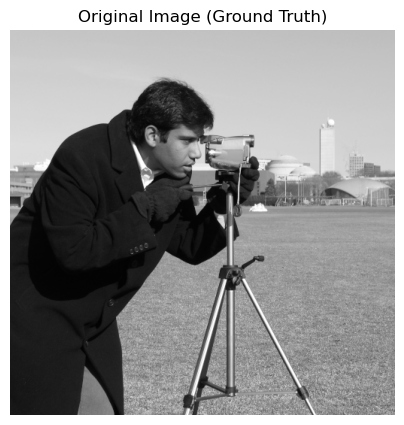

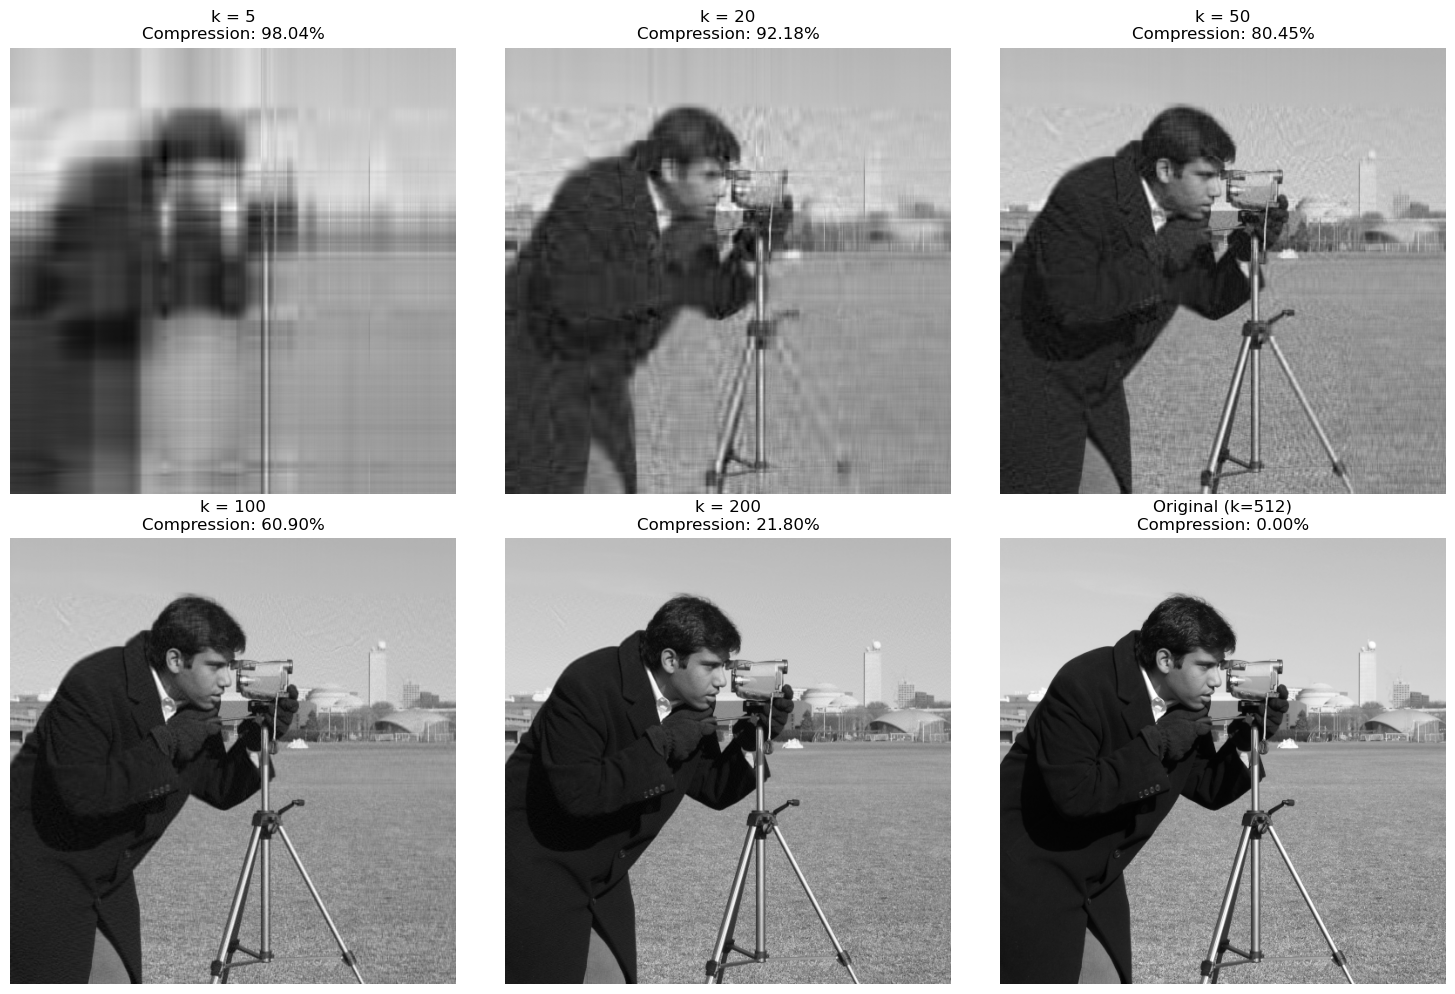

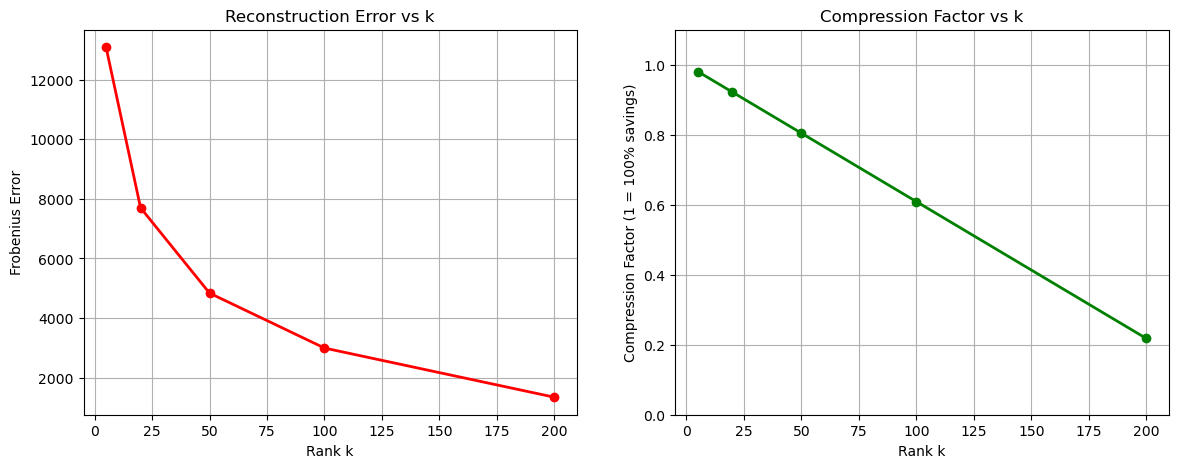

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data


X = skimage.data.camera()
m, n = X.shape
print(f"Image loaded. Shape: {m}x{n}")
X_float = X.astype(float)
U, s, Vt = np.linalg.svd(X_float, full_matrices=False)
print(f"SVD-> U: {U.shape}, s: {s.shape}, Vt: {Vt.shape}")

k_values = [5, 20, 50, 100, 200]
reconstructed_images = []
compression_factors = []
reconstruction_errors = []

print("-" * 50)
print(f"{'k':<5} | {'Compression':<12} | {'Error (Frobenius)':<20}")
print("-" * 50)

for k in k_values:
    U_k = U[:, :k]
    S_k = np.diag(s[:k])
    Vt_k = Vt[:k, :]
    X_k = U_k @ S_k @ Vt_k
    reconstructed_images.append(X_k)
    original_size = m * n
    compressed_size = k * (m + n + 1)
    c_k = 1 - (compressed_size / original_size)
    compression_factors.append(c_k)
    error = np.linalg.norm(X_float - X_k, ord='fro')
    reconstruction_errors.append(error)
    print(f"{k:<5} | {c_k:.4f}       | {error:.4f}")

plt.figure(figsize=(5, 5))
plt.imshow(X, cmap='gray')
plt.title("Original Image (Ground Truth)")
plt.axis('off')
plt.show()

plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values):
    plt.subplot(2, 3, i + 1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(f"k = {k}\nCompression: {compression_factors[i]:.2%}")
    plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(X, cmap='gray')
plt.title(f"Original (k={min(m,n)})\nCompression: 0.00%")
plt.axis('off')
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5)) 

ax1.plot(k_values, reconstruction_errors, 'r-o', linewidth=2)
ax1.set_title("Reconstruction Error vs k")
ax1.set_xlabel("Rank k")
ax1.set_ylabel("Frobenius Error")
ax1.grid(True)

ax2.plot(k_values, compression_factors, 'g-o', linewidth=2)
ax2.set_title("Compression Factor vs k")
ax2.set_xlabel("Rank k")
ax2.set_ylabel("Compression Factor (1 = 100% savings)")
ax2.grid(True)
ax2.set_ylim(0, 1.1)

plt.show()

# Exercise 4.5

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
df = pd.read_csv('../data/train.csv')
print("Data loaded successfully.")

data = df.values
print(f"Data shape: {data.shape}")

Y_all = data[:, 0]
X_all = data[:, 1:]

print(f"Features (X) shape: {X_all.shape}")
print(f"Labels (Y) shape: {Y_all.shape}")

Data loaded successfully.
Data shape: (42000, 785)
Features (X) shape: (42000, 784)
Labels (Y) shape: (42000,)


In [14]:
def filter_digits(X, Y, digit1, digit2):
    mask = (Y == digit1) | (Y == digit2)
    X_filtered = X[mask]
    Y_filtered = Y[mask]
    return X_filtered, Y_filtered

def split_data(X, Y, train_ratio=0.8):
    N = X.shape[0]
    indices = np.arange(N)
    np.random.shuffle(indices)
    
    train_size = int(N * train_ratio)
    train_idx = indices[:train_size]
    test_idx = indices[train_size:]
    
    X_train, Y_train = X[train_idx], Y[train_idx]
    X_test, Y_test = X[test_idx], Y[test_idx]
    
    return (X_train, Y_train), (X_test, Y_test)

digit_a = 3
digit_b = 4

X_filtered, Y_filtered = filter_digits(X_all, Y_all, digit_a, digit_b)
print(f"Filtered for digits {digit_a} and {digit_b}. New shape: {X_filtered.shape}")

(X_train, Y_train), (X_test, Y_test) = split_data(X_filtered, Y_filtered)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

centroid = np.mean(X_train, axis=0)

Xc_train = X_train - centroid
Xc_test = X_test - centroid

U, s, Vt = np.linalg.svd(Xc_train, full_matrices=False)

k = 2
Vk = Vt[:k, :].T 

Z_train = Xc_train @ Vk
Z_test = Xc_test @ Vk

print(f"Projected Z_train shape: {Z_train.shape}")

Filtered for digits 3 and 4. New shape: (8423, 784)
Training set size: 6738
Test set size: 1685
Projected Z_train shape: (6738, 2)


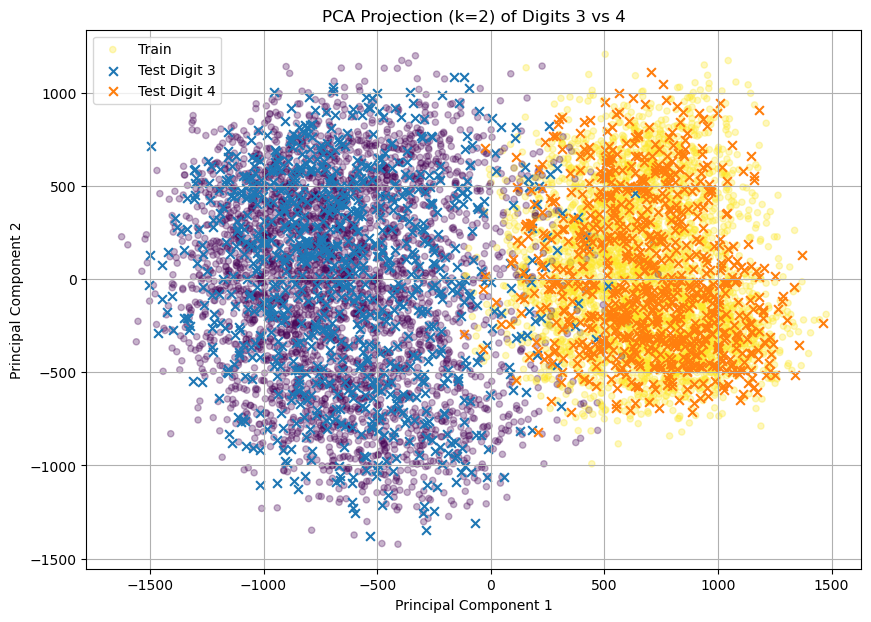

In [15]:

plt.figure(figsize=(10, 7))

scatter_train = plt.scatter(Z_train[:, 0], Z_train[:, 1], c=Y_train, 
                            cmap='viridis', alpha=0.3, label='Train', s=20)

for digit in [digit_a, digit_b]:
   
    mask = (Y_test == digit)
   
    plt.scatter(Z_test[mask, 0], Z_test[mask, 1], 
                marker='x', s=40, label=f'Test Digit {digit}')

plt.title(f"PCA Projection (k=2) of Digits {digit_a} vs {digit_b}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


--- Analyzing Digits 5 vs 8 ---


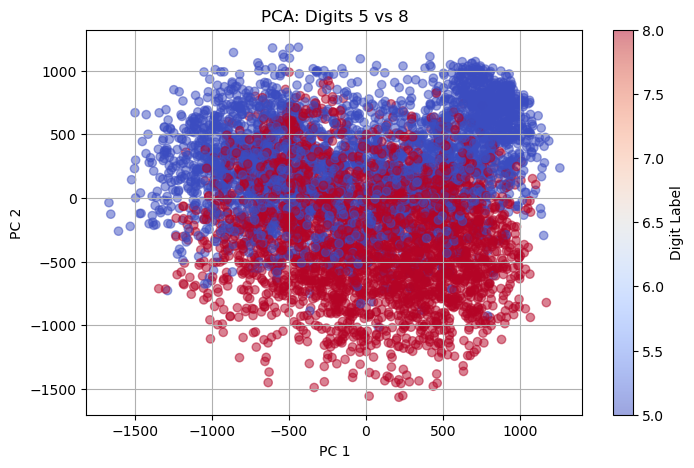


--- Analyzing Digits 1 vs 7 ---


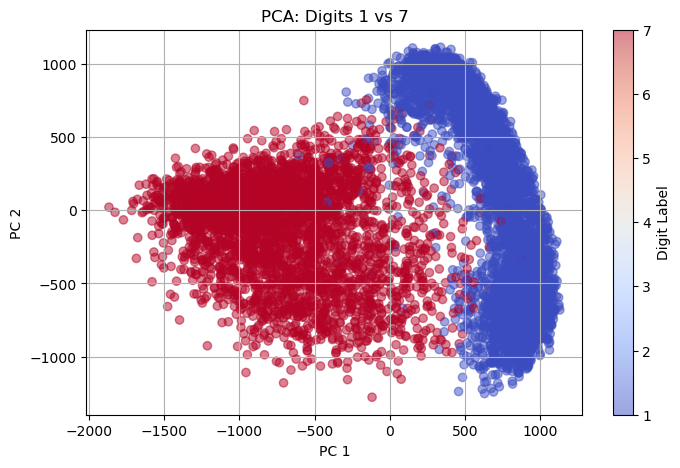

In [16]:
def analyze_digit_pair(digit1, digit2):
    print(f"\n--- Analyzing Digits {digit1} vs {digit2} ---")
    
    X_filt, Y_filt = filter_digits(X_all, Y_all, digit1, digit2)
    (X_tr, Y_tr), (X_te, Y_te) = split_data(X_filt, Y_filt)
    
    cent = np.mean(X_tr, axis=0)
    Xc_tr = X_tr - cent
    Xc_te = X_te - cent
    
    U, s, Vt = np.linalg.svd(Xc_tr, full_matrices=False)
    Vk = Vt[:2, :].T
    Z_tr = Xc_tr @ Vk
    
    plt.figure(figsize=(8, 5))
    scatter = plt.scatter(Z_tr[:, 0], Z_tr[:, 1], c=Y_tr, cmap='coolwarm', alpha=0.5)
    plt.title(f"PCA: Digits {digit1} vs {digit2}")
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.colorbar(scatter, label='Digit Label')
    plt.grid(True)
    plt.show()

analyze_digit_pair(5, 8)
analyze_digit_pair(1, 7)

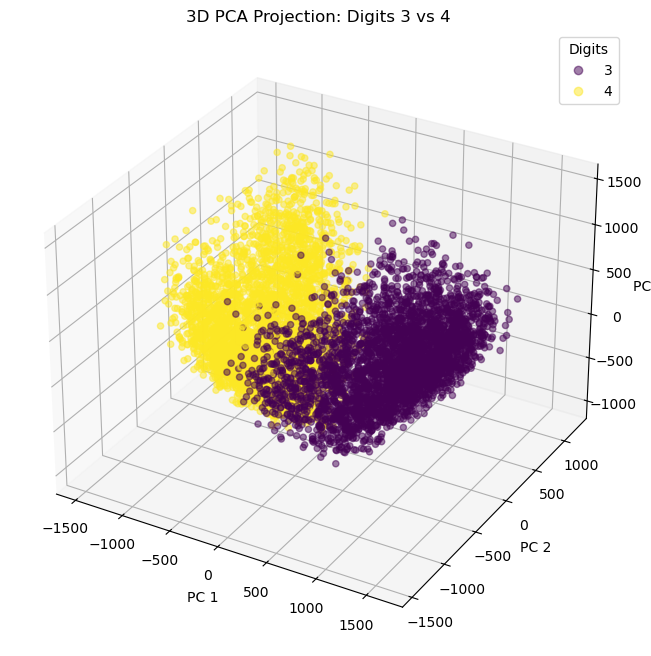

In [17]:

digit_a, digit_b = 3, 4
X_filt, Y_filt = filter_digits(X_all, Y_all, digit_a, digit_b)
(X_tr, Y_tr), _ = split_data(X_filt, Y_filt)

cent = np.mean(X_tr, axis=0)
Xc_tr = X_tr - cent
U, s, Vt = np.linalg.svd(Xc_tr, full_matrices=False)

k = 3
Vk = Vt[:k, :].T
Z_tr_3d = Xc_tr @ Vk

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(Z_tr_3d[:, 0], Z_tr_3d[:, 1], Z_tr_3d[:, 2], 
                c=Y_tr, cmap='viridis', alpha=0.5)

ax.set_title(f"3D PCA Projection: Digits {digit_a} vs {digit_b}")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.legend(*sc.legend_elements(), title="Digits")
plt.show()

# Exercise 4.6

### Step 1: loading

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Filtered Dataset Shape: (8423, 784). Original shape:(42000, 784)
Projection Matrix P shape: (784, 2)
Projected Train Shape: (6738, 2)
Projected Test Shape:  (1685, 2)


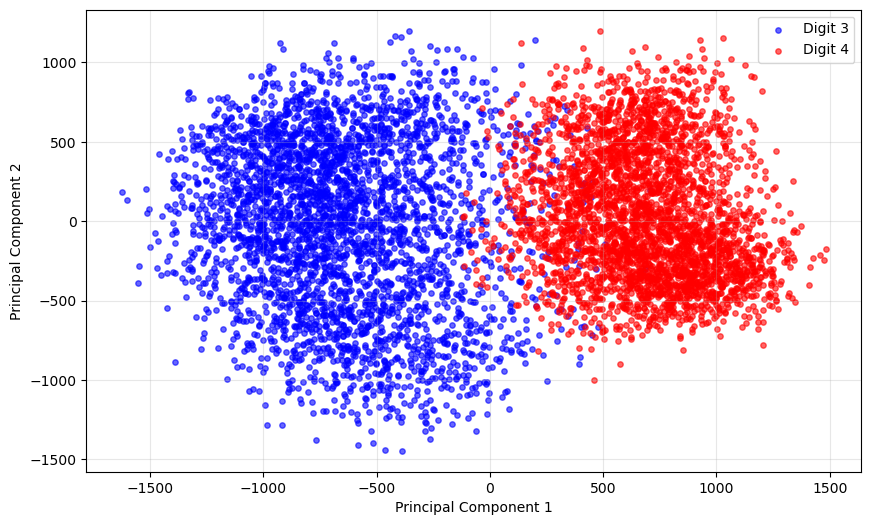

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('../data/train.csv')

display(data.describe())

random_state = 42
X_raw = data.drop('label', axis=1).values
y_raw = data['label'].values

mask = (y_raw == 3) | (y_raw == 4)
X_filtered = X_raw[mask]
y_filtered = y_raw[mask]
print(f"Filtered Dataset Shape: {X_filtered.shape}. Original shape:{X_raw.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=random_state, stratify=y_filtered
)

mean_vec = np.mean(X_train, axis=0)

X_c_train = X_train - mean_vec
X_c_test = X_test - mean_vec

u, s, vh = np.linalg.svd(X_c_train, full_matrices=False)

P = vh[:2, :].T

print(f"Projection Matrix P shape: {P.shape}")

Z_train = X_c_train @ P
Z_test = X_c_test @ P

print(f"Projected Train Shape: {Z_train.shape}")
print(f"Projected Test Shape:  {Z_test.shape}")

plt.figure(figsize=(10, 6))
classes = [3, 4]
colors = ['blue', 'red']

for digit, color in zip(classes, colors):
    subset = Z_train[y_train == digit]
    plt.scatter(subset[:, 0], subset[:, 1], 
                alpha=0.6, s=15, label=f"Digit {digit}", c=color)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Step 2: fit a linear classifier

C:\Users\filip\AppData\Local\Temp\ipykernel_3104\3723162870.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Learned Theta: [-11.6721   3.7126   0.2542]


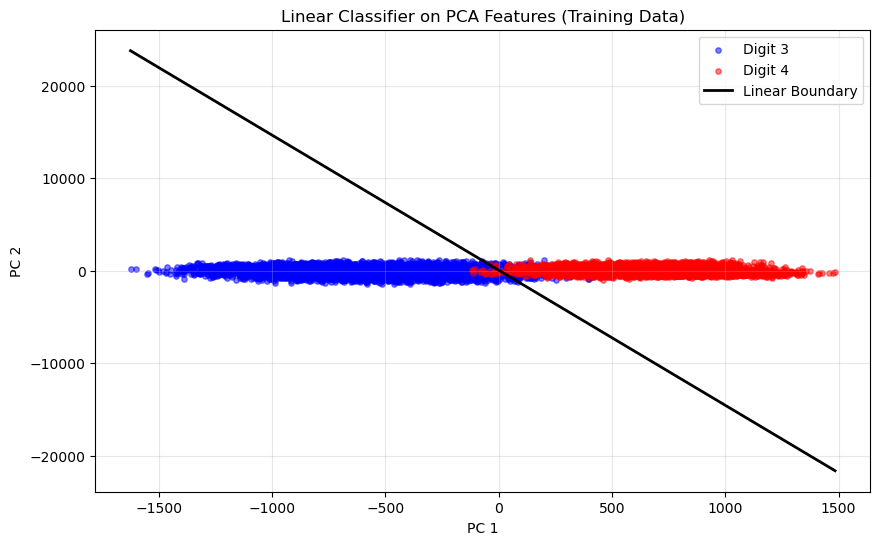

--- Test Set Evaluation ---
Accuracy:  0.9739
Precision: 0.9519 (Digit 4)
Recall:    0.9963 (Digit 4)
Confusion Matrix:
 [[829  41]
  [3  812]]


In [24]:
#to make the sigmoid work we have to map the labels: 3->0, 4->1
y_train_bin = (y_train == 4).astype(int)
y_test_bin = (y_test == 4).astype(int)

# Add bias term (column of 1s) to Z
N_train = Z_train.shape[0]
N_test = Z_test.shape[0]

Z_train_b = np.hstack((np.ones((N_train, 1)), Z_train))
Z_test_b = np.hstack((np.ones((N_test, 1)), Z_test))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hyperparameters
lr = 0.01
epochs = 200
batch_size = 32
D = Z_train_b.shape[1] # Dimension is now 3 (Bias + PC1 + PC2)

# Initialize Theta
np.random.seed(42)
theta = np.zeros(D)

for epoch in range(epochs):
    # Shuffle
    indices = np.random.permutation(N_train)
    Z_shuff, y_shuff = Z_train_b[indices], y_train_bin[indices]
    
    for i in range(0, N_train, batch_size):
        Z_batch = Z_shuff[i:i+batch_size]
        y_batch = y_shuff[i:i+batch_size]
        
        # Forward
        preds = sigmoid(Z_batch @ theta)
        
        # Gradient: X.T * (preds - y) / N
        grad = Z_batch.T @ (preds - y_batch) / len(y_batch)
        
        # Update
        theta -= lr * grad

print(f"Learned Theta: {np.round(theta, 4)}")#[-11.6241   1.1067   0.183 ]

# --- 1. Plotting the Decision Boundary ---
plt.figure(figsize=(10, 6))

# Scatter plot of Training Data
# We plot points classified as 3 (blue) and 4 (red)
plt.scatter(Z_train[y_train==3, 0], Z_train[y_train==3, 1], alpha=0.5, label='Digit 3', c='blue', s=15)
plt.scatter(Z_train[y_train==4, 0], Z_train[y_train==4, 1], alpha=0.5, label='Digit 4', c='red', s=15)

# Calculate Decision Boundary Line
# We define a range for z1 (PC1) covering the data spread
z1_vals = np.linspace(Z_train[:, 0].min(), Z_train[:, 0].max(), 100)
# Solve for z2
z2_vals = - (theta[0] + theta[1] * z1_vals) / theta[2]

plt.plot(z1_vals, z2_vals, 'k-', linewidth=2, label='Linear Boundary')

plt.title("Linear Classifier on PCA Features (Training Data)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- 2. Evaluation on Test Set ---

# Predict on Test Data
probs_test = sigmoid(Z_test_b @ theta)
preds_test = (probs_test >= 0.5).astype(int)

# Metrics Calculation
tp = np.sum((preds_test == 1) & (y_test_bin == 1)) # Correctly predicted 4
tn = np.sum((preds_test == 0) & (y_test_bin == 0)) # Correctly predicted 3
fp = np.sum((preds_test == 1) & (y_test_bin == 0)) # Predicted 4, actually 3
fn = np.sum((preds_test == 0) & (y_test_bin == 1)) # Predicted 3, actually 4

accuracy = (tp + tn) / len(y_test_bin)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

print("--- Test Set Evaluation ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f} (Digit 4)")
print(f"Recall:    {recall:.4f} (Digit 4)")
print(f"Confusion Matrix:\n [[{tn}  {fp}]\n  [{fn}  {tp}]]")


### Step 3: PCA

Centroid Digit 3 (PCA coords): [-641.    -32.75]
Centroid Digit 4 (PCA coords): [685.08  35.  ]

--- PCA-Centroid Classifier Results ---
Accuracy:  0.9733
Precision: 0.9519
Recall:    0.9951
Confusion Matrix:
 [[829  41]
  [4  811]]


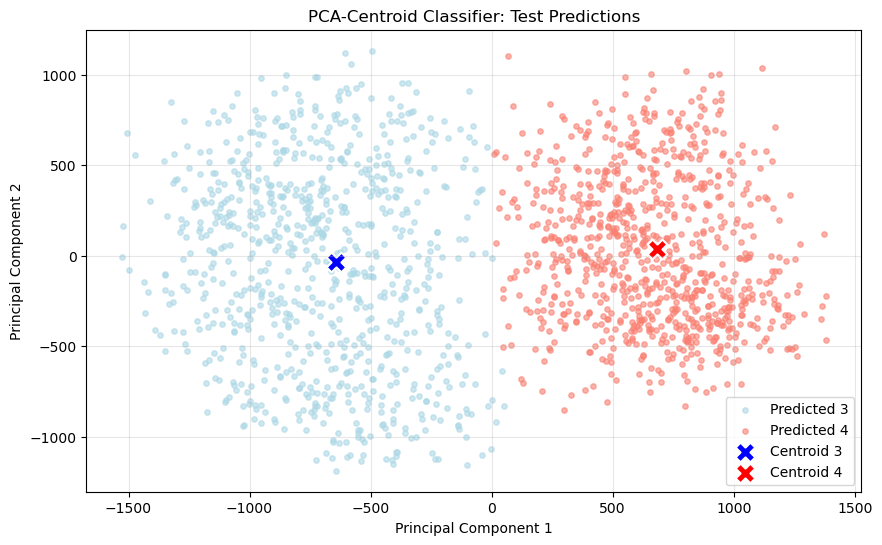

In [21]:
# --- 1. Compute Centroids ---

# We filter the projected training data (Z_train) by class label
# y_train_bin was defined in Step 2: 0 for "Digit 3", 1 for "Digit 4"
Z_3 = Z_train[y_train_bin == 0]
Z_4 = Z_train[y_train_bin == 1]

# Calculate the mean position (centroid) for each cluster
# axis=0 computes the mean across the rows (samples), resulting in a (2,) vector
mu_3 = np.mean(Z_3, axis=0)
mu_4 = np.mean(Z_4, axis=0)

print(f"Centroid Digit 3 (PCA coords): {np.round(mu_3, 2)}")
print(f"Centroid Digit 4 (PCA coords): {np.round(mu_4, 2)}")

# --- 2. Classification on Test Set ---

# We compute the Euclidean distance from every test point to each centroid.
# Z_test has shape (N_test, 2).
# mu_3 has shape (2,).
# Numpy broadcasting allows us to subtract the vector mu from every row of Z_test.

# Distance to Centroid 3: || z - mu_3 ||
dist_3 = np.linalg.norm(Z_test - mu_3, axis=1)

# Distance to Centroid 4: || z - mu_4 ||
dist_4 = np.linalg.norm(Z_test - mu_4, axis=1)

# Prediction Rule:
# If dist_4 < dist_3, predict 1 (Digit 4). Otherwise, predict 0 (Digit 3).
preds_centroid = (dist_4 < dist_3).astype(int)

# --- 3. Evaluation ---

# We compare our geometric predictions against the true binary labels
tp = np.sum((preds_centroid == 1) & (y_test_bin == 1))
tn = np.sum((preds_centroid == 0) & (y_test_bin == 0))
fp = np.sum((preds_centroid == 1) & (y_test_bin == 0))
fn = np.sum((preds_centroid == 0) & (y_test_bin == 1))

# Standard Metrics
acc_cent = (tp + tn) / len(y_test_bin)
prec_cent = tp / (tp + fp) if (tp + fp) > 0 else 0.0
rec_cent = tp / (tp + fn) if (tp + fn) > 0 else 0.0

print("\n--- PCA-Centroid Classifier Results ---")
print(f"Accuracy:  {acc_cent:.4f}")
print(f"Precision: {prec_cent:.4f}")
print(f"Recall:    {rec_cent:.4f}")
print(f"Confusion Matrix:\n [[{tn}  {fp}]\n  [{fn}  {tp}]]")

# --- 4. Visualization ---
plt.figure(figsize=(10, 6))

# Plot the Test points, colored by their PREDICTED class
# This visualizes the decision regions created by the centroids
plt.scatter(Z_test[preds_centroid==0, 0], Z_test[preds_centroid==0, 1], 
            c='lightblue', alpha=0.6, s=15, label='Predicted 3')
plt.scatter(Z_test[preds_centroid==1, 0], Z_test[preds_centroid==1, 1], 
            c='salmon', alpha=0.6, s=15, label='Predicted 4')

# Plot the actual Centroids
plt.scatter(mu_3[0], mu_3[1], c='blue', s=200, marker='X', edgecolors='white', linewidth=1.5, label='Centroid 3')
plt.scatter(mu_4[0], mu_4[1], c='red', s=200, marker='X', edgecolors='white', linewidth=1.5, label='Centroid 4')

plt.title("PCA-Centroid Classifier: Test Predictions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Step 4: comparing

C:\Users\filip\AppData\Local\Temp\ipykernel_3104\3723162870.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


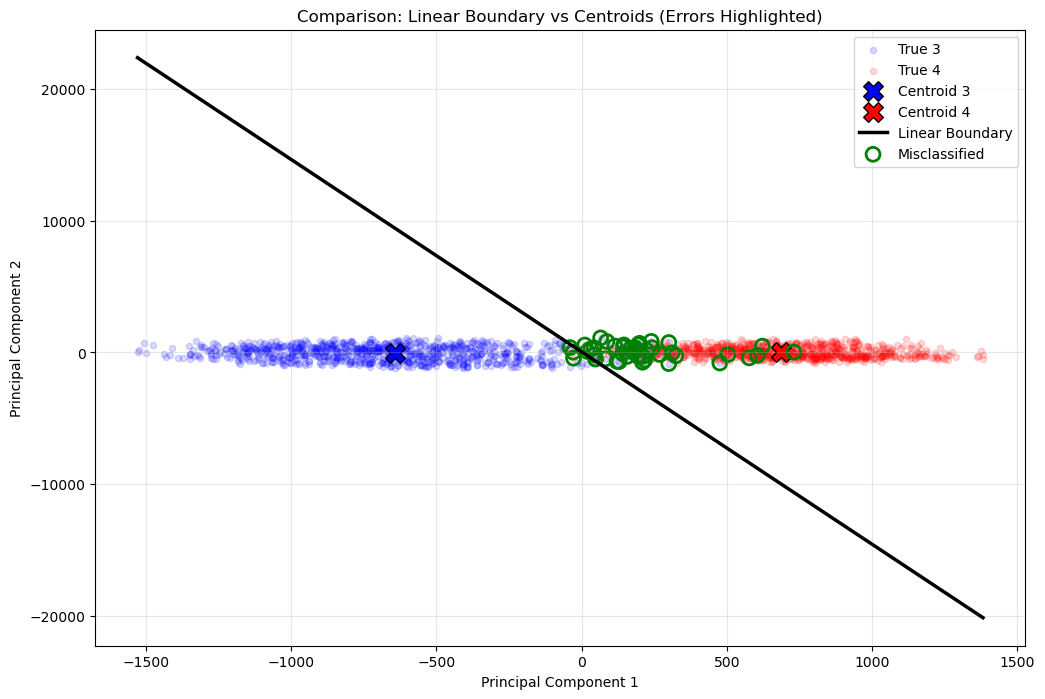

Linear Model Accuracy:   0.9739
Centroid Model Accuracy: 0.9733
Total Misclassified Points: 44 out of 1685


In [22]:
# --- 1. Identify Misclassified Points (Linear Model) ---
# We use the Theta learned in Step 2 to get predictions
probs_linear = sigmoid(Z_test_b @ theta)
preds_linear = (probs_linear >= 0.5).astype(int)

# Boolean mask for errors: True where Prediction != Truth
error_mask = (preds_linear != y_test_bin)
Z_errors = Z_test[error_mask]

# --- 2. Combined Visualization ---
plt.figure(figsize=(12, 8))

# A. Plot True Classes (dimmed)
plt.scatter(Z_test[y_test_bin==0, 0], Z_test[y_test_bin==0, 1], 
            c='blue', alpha=0.15, s=20, label='True 3')
plt.scatter(Z_test[y_test_bin==1, 0], Z_test[y_test_bin==1, 1], 
            c='red', alpha=0.15, s=20, label='True 4')

# B. Plot Centroids
plt.scatter(mu_3[0], mu_3[1], c='blue', s=200, marker='X', edgecolors='black', label='Centroid 3')
plt.scatter(mu_4[0], mu_4[1], c='red', s=200, marker='X', edgecolors='black', label='Centroid 4')

# C. Plot Linear Decision Boundary
# We calculate the line z2 = -(theta0 + theta1*z1) / theta2
x_range = np.linspace(Z_test[:, 0].min(), Z_test[:, 0].max(), 100)
y_range = - (theta[0] + theta[1] * x_range) / theta[2]
plt.plot(x_range, y_range, 'k-', linewidth=2.5, label='Linear Boundary')

# D. Highlight Errors
plt.scatter(Z_errors[:, 0], Z_errors[:, 1], 
            facecolors='none', edgecolors='green', s=100, linewidth=2, label='Misclassified')

plt.title("Comparison: Linear Boundary vs Centroids (Errors Highlighted)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- 3. Quantitative Comparison ---
print(f"Linear Model Accuracy:   {accuracy:.4f}")
print(f"Centroid Model Accuracy: {acc_cent:.4f}")
print(f"Total Misclassified Points: {len(Z_errors)} out of {len(y_test)}")